In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset

dataset = pd.read_excel('Linear Regression.xlsx',sheet_name=0)
dataset.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


# 2) Regression model for bedrooms and price

In [4]:
# checking for any null values in bedrooms
dataset['bedrooms'].isna().sum()

0

In [5]:
# checking for any null values in price
dataset['price'].isna().sum()

0

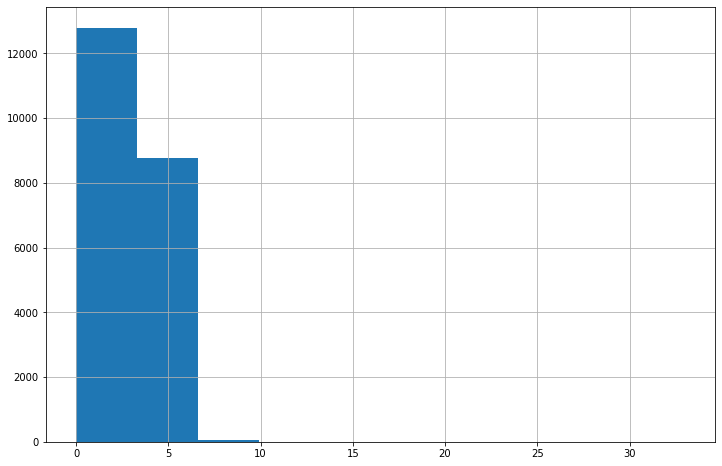

In [9]:
# determining density of records for different range of values for the Independent variable
dataset['bedrooms'].hist(figsize = (12,8))

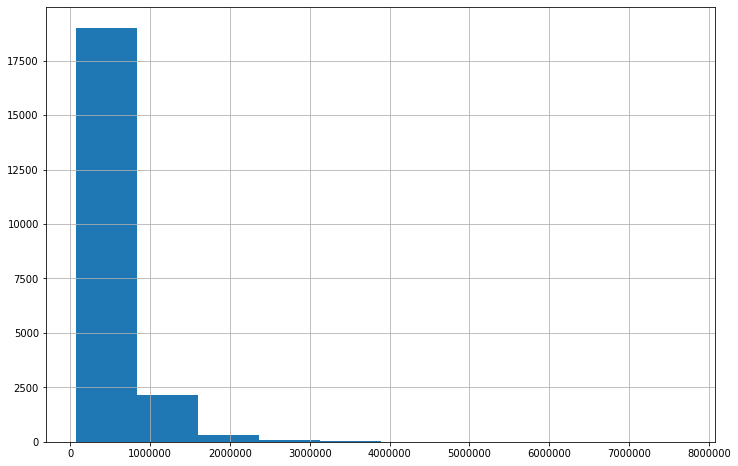

In [8]:
# determining density of records for different range of values for the Dependent variable
dataset['price'].hist(figsize = (12,8))